조건 1. 파일명은 반드시 "[본인이름]_[학번]_기말고사.ipynb" 로 작성할 것. 즉, 이름은 홍길동이고 학번이 20230000인 경우에는 아래와 같음.
             홍길동_20230000_기말고사.ipynb
조건 2. 노트북으로 작성한 코드는 반드시 실행하여 output이 있는 상태로 제출해야 함.
조건 3. 주석은 반드시 포함. 분량은 정해진 바 없으나 코드를 충분히 설명할 수 있어야 함.
조건 4. 노트북과는 별도로 노트북 화면을 캡쳐하여 제출.(미리보기 용도) 코드가 길 경우 여러개의 파일로 제출해도 됨. 단, 파일 이름에 순서를 매겨야함.

[기말고사 문제]

서울 열린데이터 광장 사이트(https://data.seoul.go.kr/)에서 “서울시 공공자전거 대여소별 이용정보(월별)”을 다운받아서 데이터를 분석한다. 
2024년 한해동안 서울특별시의 공공자전거 대여 데이터를 비교하여 어떤 변화가 있는지 확인하고 그 결과를 notebook에서 output으로 출력하여 파일을 제출한다.
“서울특별시 공공자전거 대여소별 이용정보(월별)_24.1-6.csv”
“서울특별시 공공자전거 대여소별 이용정보(월별)_24.7-12.csv”

문제 1 ― 월별 이용량 분석
대여일자(YYYYMM)에서 월을 추출하여 1 월 ~ 12 월별 총 이용건수를 집계하고, 막대그래프로 시각화하시오.

문제 2 ― 연령대별 이용량 비교
연령대코드(~10대, 20대, 30대, 40대, 50대, 60대, 70대이상, 기타)별로 전체 이용건수를 합산한 뒤, 정의된 순서대로 막대그래프로 시각화하시오.

문제 3 ― 상위 10개 대여소의 월별 추이
전체 기간 이용건수 기준 상위 10개 대여소를 선정한 뒤, 이들 대여소의 월별 이용건수를 집계하여 그래프로 비교하시오.

문제 4 ― 하위 10개 대여소 진단
이용건수 합계가 가장 적은 하위 10개 대여소를 추출하여 표 형태로 제시하시오.

문제 5 ― 대여소별 평균 주행속도
각 대여소에 대해 이동거리(M)를 km로, 이용시간(분)을 h로 변환, 평균 주행속도(km/h) = 총거리(km) ÷ 총시간(h) 계산
주행속도 상·하위 10개 대여소를 표로 제시하시오.

문제 6 ― 대여구분 × 연령대 교차 분석
대여구분코드(정기권, 일일권, 일일권(비회원))와 연령대코드의 교차표를 작성하여 이용건수 총합을 비교하시오.

문제 7 ― 20대 vs 30대 상위 30위 대여소 교집합
20대와 30대 각각에서 이용건수 합계 상위 30위에 드는 대여소를 구한 뒤, 양쪽 모두에 포함되는 대여소 목록과 개수를 제시하시오.

문제 8 ― 위의 통계를 도출하면서 필요한 전처리(중복 제거, 누락값 처리, 잘못된 값 처리 등)를 수행하시오.

[인공지능 도구활용]
서울시 따릉이 데이터가 제공하는 정보로 할 수 있는 기본적인 분석(ex. 월별 이용량, 연령대별 이용량 비교 등)은 직접 출제하고
그 외 유의미한 분석이 뭐가 있을지 ChatGPT(GPT-4)에게 아이디어를 받았습니다. 
그리고 2023년 기말고사 문제에서 사용되는 내용을 보고 비슷하게 분석할 만한 문제(7번)를 추가했습니다.

전체 코드는 ChatGPT(GPT-4)를 활용하여 작성한 분석 절차 및 시각화 예시입니다.
분석 목적과 문제를 입력 후 작성된 코드를 실제 실행해보고 마음에 들지 않는 부분(ex. pf 변환, 범주 순서, 그래프 범례 등)은 보완해달라고 요청하였습니다. 최종적으로 GPT가 제시한 코드를 제가 일부 수정해서 분석을 완성했습니다.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 파일 경로 설정
path = "C:/Users/EUNSUK/Documents/"
file_1 = path + "서울특별시 공공자전거 이용정보(월별)_24.1-6.csv"
file_2 = path + "서울특별시 공공자전거 이용정보(월별)_24.7-12.csv"

# CSV 파일 불러오기
df_1 = pd.read_csv(file_1, encoding='cp949', low_memory=False)
df_2 = pd.read_csv(file_2, encoding='cp949', low_memory=False)

# 데이터 통합
df_bicycle = pd.concat([df_1, df_2], ignore_index=True)

# 데이터 확인
df_bicycle.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202401,102,102. 망원역 1번출구 앞,일일권,NaN,20대,30,1562.85,14.77,63766.65,547
1,202401,102,102. 망원역 1번출구 앞,일일권,NaN,30대,21,1082.06,9.53,41075.31,393
2,202401,102,102. 망원역 1번출구 앞,일일권,NaN,40대,4,82.63,0.73,3178.67,66
3,202401,102,102. 망원역 1번출구 앞,일일권,NaN,50대,3,160.96,1.63,7009.09,44
4,202401,102,102. 망원역 1번출구 앞,일일권,NaN,기타,4,68.96,0.78,3375.82,40


In [75]:
# 대여소 번호, 대여구분코드, 이용건수 중 하나라도 결측이면 제거
df_bicycle_clean = df_bicycle.dropna(subset=['이용건수'])

In [76]:
df_bicycle_clean = df_bicycle.loc[:, '대여일자' : '이용시간(분)']

In [77]:
# 결측값 확인
# 성별은 공개하지 않는 사례가 많아서 제거하지 않음

print("남은 결측값:\n", df_bicycle_clean.isnull().sum())

남은 결측값:
 대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         390301
연령대코드           0
이용건수            0
운동량           750
탄소량           750
이동거리(M)         0
이용시간(분)         0
dtype: int64


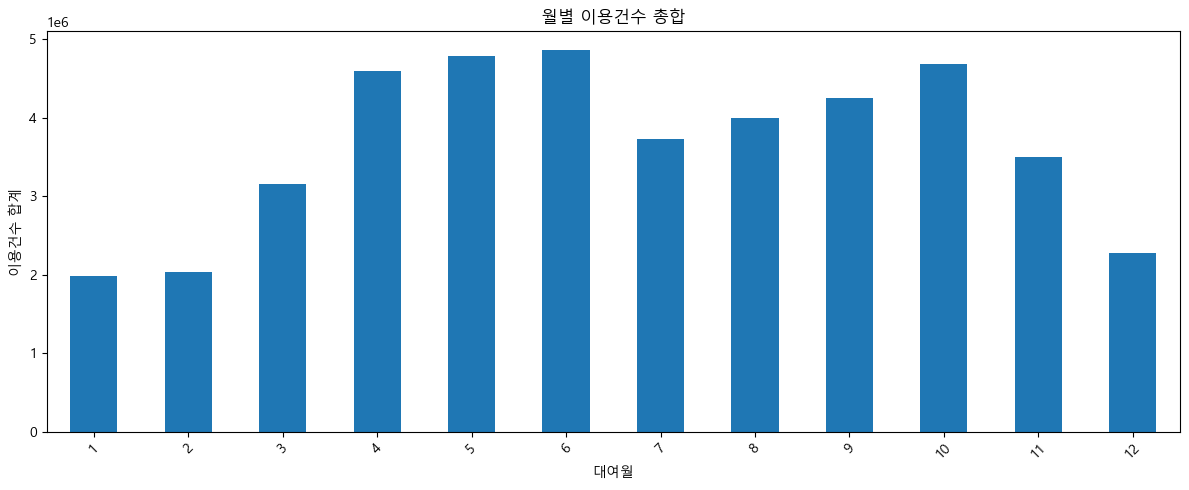

In [78]:
# 1. 월별 대여량 비교 그래프 작성

# 한글 폰트 설정
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

# 대여일자에서 월 컬럼 생성
df_bicycle_clean['월'] = df_bicycle_clean['대여일자'].astype(str).str[-2:].astype(int)

# 대여월 기준 이용건수 총합 집계
monthly_total = df_bicycle_clean.groupby('월')['이용건수'].sum().sort_index()

# 시각화
monthly_total.plot(kind='bar', figsize=(12, 5), title='월별 이용건수 총합')
plt.xlabel("대여월")
plt.ylabel("이용건수 합계")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

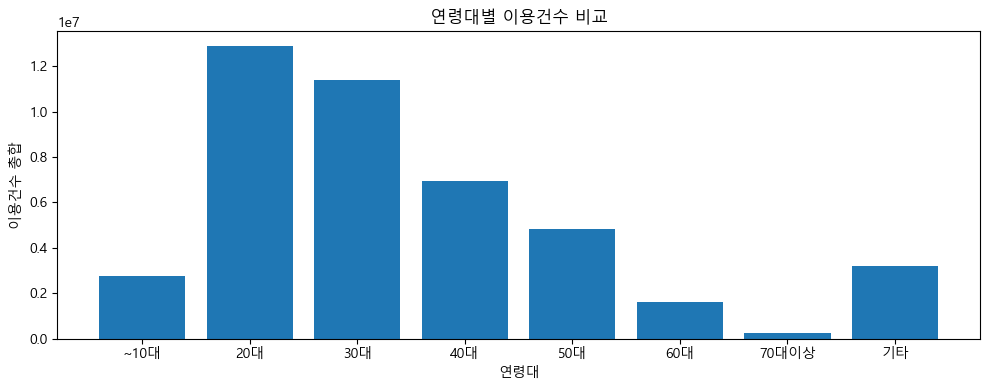

In [79]:
# 2번. 연령대별 이용건수 비교
# 분석 대상 데이터프레임에서 필요한 열만 선택하고 결측치 제거
df_usage = df_bicycle_clean[['연령대코드', '이용건수']].dropna()

# 원하는 연령대 순서 정의
age_order = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타']

# 연령대코드를 범주형으로 지정하여 순서 고정
df_usage['연령대코드'] = pd.Categorical(df_usage['연령대코드'], categories=age_order, ordered=True)

# 연령대별 이용건수 총합 집계
usage_summary = (
    df_usage.groupby('연령대코드', observed=True)['이용건수']
    .sum()
    .reindex(age_order)
    .reset_index()
)
# 시각화
plt.figure(figsize=(10, 4))
plt.bar(usage_summary['연령대코드'], usage_summary['이용건수'])
plt.title('연령대별 이용건수 비교')
plt.xlabel('연령대')
plt.ylabel('이용건수 총합')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
usage_summary

,연령대코드,이용건수
0,~10대,2755511
1,20대,12888214
2,30대,11388219
3,40대,6931824
4,50대,4825659
5,60대,1621583
6,70대이상,261503
7,기타,3177046


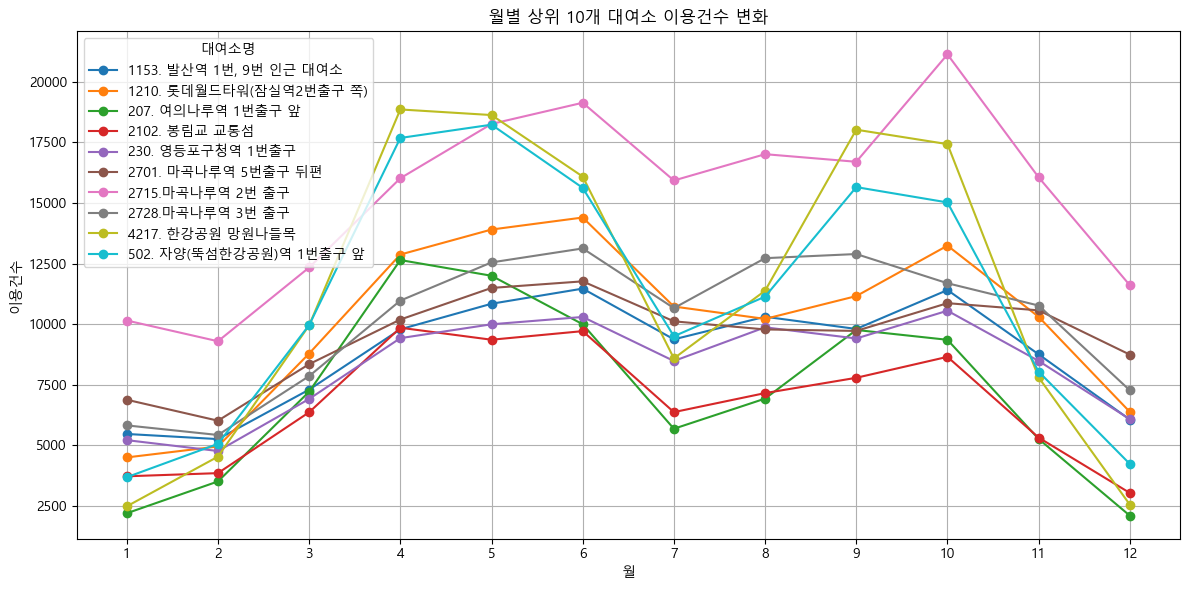

In [81]:
# 3번 대여소명(스테이션) 기준으로 상위 10개 대여소의 월별 이용건수 변화

# 상위 10개 대여소 추출
top10_station_counts = (
    df_bicycle_clean.groupby('대여소명')['이용건수']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# 데이터프레임으로 변환
top10_station_df = top10_station_counts.reset_index()
top10_station_df.columns = ['대여소명', '이용건수_총합']

# 상위 10개 대여소명 리스트 생성
top10_names = top10_station_df['대여소명'].tolist()

# 월 컬럼 생성 (대여일자에서 추출)
df_bicycle_clean['월'] = df_bicycle_clean['대여일자'].astype(str).str[-2:].astype(int)

# 상위 10개 대여소 필터링
df_top10 = df_bicycle_clean[df_bicycle_clean['대여소명'].isin(top10_names)]

# 대여소별 월별 이용건수 집계
monthly_usage = df_top10.groupby(['대여소명', '월'])['이용건수'].sum().reset_index()

# 피벗 테이블 생성
pivot_df = monthly_usage.pivot(index='월', columns='대여소명', values='이용건수')

# 시각화
pivot_df.plot(kind='line', marker='o', figsize=(12, 6), title="월별 상위 10개 대여소 이용건수 변화")
plt.xlabel("월")
plt.ylabel("이용건수")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [82]:
monthly_usage.head()

,대여소명,월,이용건수
0,"1153. 발산역 1번, 9번 인근 대여소",1,5460
1,"1153. 발산역 1번, 9번 인근 대여소",2,5248
2,"1153. 발산역 1번, 9번 인근 대여소",3,7291
3,"1153. 발산역 1번, 9번 인근 대여소",4,9783
4,"1153. 발산역 1번, 9번 인근 대여소",5,10838


In [83]:
# 4번. 가장 이용율이 떨어지는 하위 10개 대여소와 이용건수

# 대여소별 전체 이용건수 합계 계산
station_total_counts = (
    df_bicycle_clean.groupby('대여소명')['이용건수']
    .sum()
    .sort_values(ascending=True)  # 오름차순 정렬 → 하위부터
)

# 하위 10개 대여소 추출
bottom10_station_counts = station_total_counts.head(10)

# 데이터프레임 변환
bottom10_station_df = bottom10_station_counts.reset_index()
bottom10_station_df.columns = ['대여소명', '이용건수_총합']

# 결과 출력
print("이용률이 가장 낮은 하위 10개 대여소:")
display(bottom10_station_df)

이용률이 가장 낮은 하위 10개 대여소:


,대여소명,이용건수_총합
0,1816. 금천폭포공원 앞,8
1,4348. 사당역 1번출구,75
2,4936. SK텔레콤(T1) 인근,95
3,4335. 인재개발원 배움관,121
4,4314. 탑성마을 버스정거장 옆,135
5,3538. 서울숲 IT캐슬,193
6,3306.서울신우초등학교,194
7,4343. 헌인릉 입구,270
8,2612. 문정·가락 대여소 앞,310
9,2061. 한강 현대아파트 건너편,319


In [84]:
# 5번 대여소별 시간당 이동거리 비교

# 필요한 열만 복사
df_temp = df_bicycle_clean[['대여소명', '이동거리(M)', '이용시간(분)']].copy()

# 단위 변환
df_temp['이동거리(km)'] = df_temp['이동거리(M)'] / 1000
df_temp['이용시간(h)'] = df_temp['이용시간(분)'] / 60

# 평균 이동거리, 평균 이용시간, 속도(km/h) 계산
station_ave_df = df_temp.groupby('대여소명').agg({
    '이동거리(km)': 'mean',
    '이용시간(h)': 'mean'
}).reset_index()

# 이동속도 = 거리(km) / 시간(h)
station_ave_df['이동속도(km/h)'] = station_ave_df['이동거리(km)'] / station_ave_df['이용시간(h)']

# 소수점 정리
station_ave_df = station_ave_df.round(2)

# 이동속도 기준 정렬
station_ave_df = station_ave_df.sort_values(by='이동속도(km/h)', ascending=False)

In [85]:
station_ave_df.head(10)

,대여소명,이동거리(km),이용시간(h),이동속도(km/h)
1116,2541.옛골 입구,20.94,1.87,11.21
1923,4343. 헌인릉 입구,11.46,1.09,10.53
1907,4322.서울추모공원 입구,22.68,2.20,10.29
1916,4335. 인재개발원 배움관,6.47,0.64,10.17
906,2249. 우솔초등학교 맞은편,39.82,3.92,10.15
654,"1858. 500번,507번 버스 종점 앞",65.74,6.56,10.02
1771,4077. 도봉제1교,217.46,21.80,9.98
2003,449. 일성아파트,40.21,4.03,9.97
625,1827. 독산보도육교 앞 자전거 보관소,293.17,30.02,9.77
497,1646. 삼육대 입구,51.37,5.26,9.76


In [86]:
station_ave_df.tail(10)

,대여소명,이동거리(km),이용시간(h),이동속도(km/h)
1962,4415. 미아초교버스승강장,8.35,1.86,4.48
1385,3413.종로플레이스,102.95,22.96,4.48
2524,591. 건국대학교 (행정관),38.35,8.58,4.47
1884,4277. 서대문우체국 정류소 옆,14.16,3.18,4.46
1373,339. 종로4가 사거리,50.55,11.35,4.45
2523,590. 건국대학교 (입학정보관),77.99,17.64,4.42
1383,3411.종묘,52.14,12.34,4.22
2047,455. 종로6가역 버스정류장(동대문 방향),78.34,18.66,4.20
1618,3804. 낙성대공원,16.31,4.07,4.01
56,1063.강동롯데캐슬퍼스트 아파트(관리동),46.78,11.88,3.94


In [87]:
# 6번. 대여코드 종류와 연령대별 이용건수 총계 비교

# 필요한 열만 선택 + 결측치 제거
df_usage = df_bicycle[['연령대코드', '대여구분코드', '이용건수']].dropna()

# 원하는 연령대, 대여구분코드 순서 정의
age_order = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타']
rental_order = ['정기권', '일일권', '일일권(비회원)']

# 연령대코드를 순서 있는 범주형으로 변환
df_usage['연령대코드'] = pd.Categorical(df_usage['연령대코드'], categories=age_order, ordered=True)
df_usage['대여구분코드'] = pd.Categorical(df_usage['대여구분코드'], categories=rental_order, ordered=True)

# 대여구분코드와 연령대코드 별 이용건수 총합 집계
usage_summary = (
    df_usage.groupby(['대여구분코드', '연령대코드'], observed=True)['이용건수']
    .sum()
    .reset_index()
    .sort_values(by=['대여구분코드', '연령대코드'])  # 지정된 범주 순서 유지
)

# 결과 출력
display(usage_summary)

,대여구분코드,연령대코드,이용건수
0,정기권,~10대,1966330
1,정기권,20대,9986177
2,정기권,30대,9705084
3,정기권,40대,6213482
4,정기권,50대,4516686
5,정기권,60대,1549686
6,정기권,70대이상,249862
7,정기권,기타,2280348
8,일일권,~10대,789041
9,일일권,20대,2900687


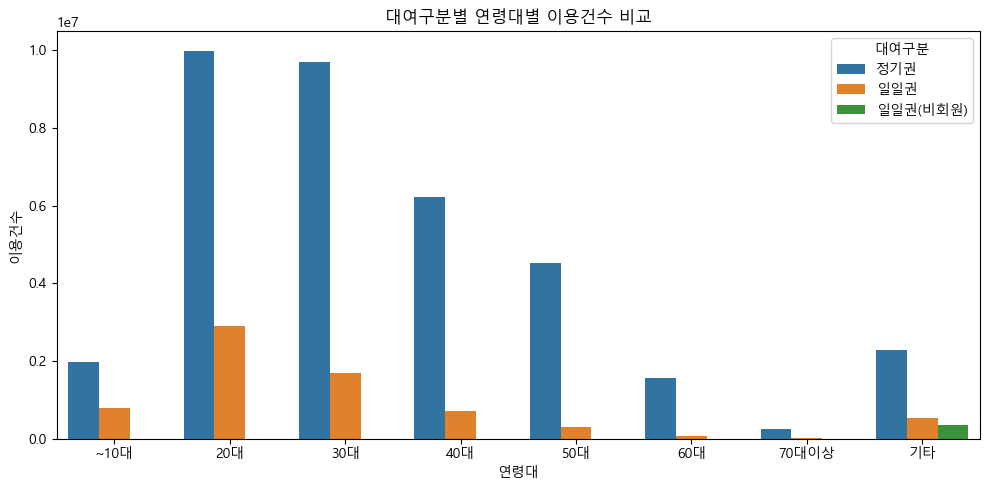

In [88]:
# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=usage_summary, x='연령대코드', y='이용건수', hue='대여구분코드')
plt.title('대여구분별 연령대별 이용건수 비교')
plt.xlabel('연령대')
plt.ylabel('이용건수')
plt.legend(title='대여구분')
plt.tight_layout()
plt.show()

In [96]:
# 7번. 20대와 30대 모두 상위 30위에 포함된 대여소 목록

# 연령대 필터링
df_20s = df_bicycle_clean[df_bicycle_clean['연령대코드'] == '20대']
df_30s = df_bicycle_clean[df_bicycle_clean['연령대코드'] == '30대']

# 각 연령대별 대여소별 이용건수 합계 → 상위 30위 추출
top30_20s = set(df_20s.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(30).index)
top30_30s = set(df_30s.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(30).index)

# 공통 대여소 추출 (교집합)
common_top30 = top30_20s & top30_30s

# 데이터프레임 변환 및 출력
common_stations_df = pd.DataFrame(sorted(common_top30), columns=['공통 상위 대여소명'])

# 결과 출력
print(f"20대와 30대 모두 상위 30위에 포함된 대여소 수: {len(common_stations_df)}개")
display(common_stations_df)

20대와 30대 모두 상위 30위에 포함된 대여소 수: 18개


,공통 상위 대여소명
0,"1153. 발산역 1번, 9번 인근 대여소"
1,1210. 롯데월드타워(잠실역2번출구 쪽)
2,1867.대륭포스트타워6차 앞
3,1911. 구로디지털단지역 앞
4,207. 여의나루역 1번출구 앞
5,2102. 봉림교 교통섬
6,230. 영등포구청역 1번출구
7,2608. 송파구청
8,2620. 송파나루역 4번 출구옆
9,2701. 마곡나루역 5번출구 뒤편
